# Data exploration of the Factory Plant Sensors Dataset with Pandas

A key part of Data Science is interactive exploration of your dataset. There are arguably many tools to perform data science, but [Python Pandas](https://pandas.pydata.org/) is one of the most widely used. 

## Data exploration using Pandas

In [1]:
#This line is needed to display the charts later in the notebook
%matplotlib widget 
#ignore deprecation warnings in this demo
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [26]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

import os

# Fetch environment variables with defaults
host = os.getenv('QDB_CLIENT_HOST', 'questdb')
port = os.getenv('QDB_CLIENT_PORT', '8812')
user = os.getenv('QDB_CLIENT_USER', 'admin')
password = os.getenv('QDB_CLIENT_PASSWORD', 'quest')

# Create the connection string using the environment variables or defaults
conn_str = f'user={user} password={password} host={host} port={port} dbname=qdb'

# Database connection details
db_config = {
    'user': user,
    'password': password,
    'host': host,
    'port': port, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')
query = 'SELECT * FROM plant_sensors limit -100000'


df = pd.read_sql(query, engine)

# Display the first few rows of the DataFrame
df.head()

,timestamp,system,address,value,text,status
0,2024-11-06 05:37:03,system012,AAA1626,NaN,message073,active
1,2024-11-06 05:37:03,system012,AAA0AEE,52.944184,None,active
2,2024-11-06 05:37:03,system012,AAA03D2,37.535532,None,active
3,2024-11-06 05:37:03,system012,AAA1100,NaN,message036,active
4,2024-11-06 05:37:03,system012,AAA109C,-0.739677,None,active


In [27]:
# Check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  100000 non-null  datetime64[ns]
 1   system     100000 non-null  object        
 2   address    100000 non-null  object        
 3   value      79306 non-null   float64       
 4   text       20694 non-null   object        
 5   status     100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 4.6+ MB


In [28]:
# Summary statistics of numerical columns
df.describe()

,timestamp,value
count,100000,79306.000000
mean,2024-11-06 10:56:17.624399872,49.032473
min,2024-11-06 05:37:03,-165.747781
25%,2024-11-06 08:19:12,3.531252
50%,2024-11-06 10:54:18,47.292311
75%,2024-11-06 13:36:27,95.122258
max,2024-11-06 16:18:36,290.835226
std,NaN,70.948386


In [23]:
# Count unique values in categorical columns
df['system'].value_counts()

system
system004    50288
system002    50262
system010    50259
system017    50208
system005    50192
system012    50137
system001    50125
system014    50088
system013    50012
system008    49996
system015    49994
system009    49962
system003    49946
system019    49944
system007    49906
system006    49803
system011    49784
system016    49784
system018    49711
system000    49599
Name: count, dtype: int64

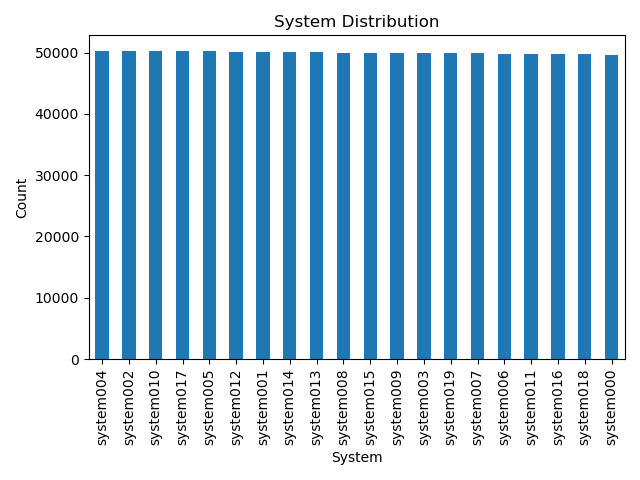

In [24]:
# Plot a bar chart for categorical columns
plt.figure()  # Create another new figure object
df['system'].value_counts().plot(kind='bar')
plt.xlabel('System')
plt.ylabel('Count')
plt.title('System Distribution')
plt.tight_layout()
plt.show()  # Display the plot
